# Language prediction

In this notebook we are going to train a simple statistical model attempting to predict the language of a string input. For this we are going to take two texts, one in Spanish and the other in English, and we are going to count the frequency with which the letters appear. This will be our basis for calculating the log likelihood for the strings to be predicted.

#### Required packages

In [8]:
import os.path # To handle paths
from math import log 
import matplotlib.pyplot as plt
import pandas as pd

#### Input alphabets
First we are going to set the base alphabets we are going to work with. For this we use ASCII codes to generate the alphabets and a dictionary to store these as lists.

In [9]:
en_alphabet = list(range(97, 123))
 
es_alphabet = en_alphabet.copy()
es_alphabet.append(241)

all_ascii = list(range(256))
non_alphabetic_en = [simbol for simbol in all_ascii if simbol not in en_alphabet] 
non_alphabetic_es = [simbol for simbol in all_ascii if simbol not in es_alphabet]

alphabets = {
    "en_alphabet": en_alphabet,
    "es_alphabet": es_alphabet,
    "non_alphabetic_en": non_alphabetic_en,
    "non_alphabetic_es": non_alphabetic_es
  }
  # We create our alphabets separating english from spanish and there respective non alphabetical charaters

#### Training the model
Now we are going to take the training texts and leave only the letters, without spaces or characters that are outside the alphabet. With this we are going to count the frequency of each letter in the texts and store that information in their corresponding dictionaries.
(Both texts are about 100,000 words long)

In [10]:
def scan_model(text_file:str, language="en")->dict:

    """
    Reads 'text_file' in 'language' format, clears nonalphabetic symbols and counts frequencies
    """
    
    with open(text_file, 'r', encoding='utf-8') as file:
        text = (file.readlines())
    all_words = "".join(text)
            
    hist = dict()

    if len(all_words) != 0:
        all_words = all_words.lower()
        for code in alphabets[f"non_alphabetic_{language}"]:
            all_words = all_words.replace(chr(code), "")

        for code in alphabets[f"{language}_alphabet"]:
            hist[chr(code)] = all_words.count(chr(code))/len(all_words)
    
    return hist

en_model = scan_model(os.path.join("Train_data","en_train.txt"), "en") 
es_model = scan_model(os.path.join("Train_data","es_train.txt"), "es") 
# 2 models are now trained by reading texts, the english model will read harry potter and will count the amount of letters 
# creating the frequencies of these(non alphabetical chars are removed), the same will be done in spanish with El quijote de la mancha 


#### Frecuencies of the English model

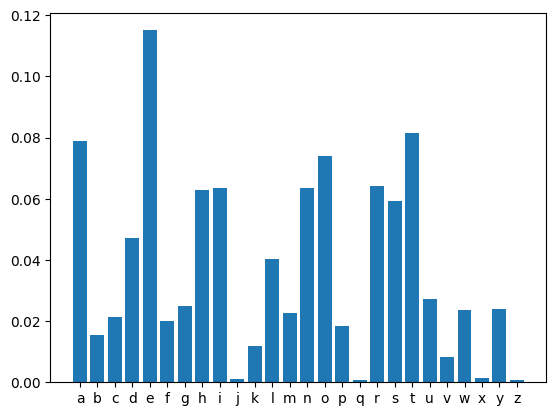

In [11]:
names = list(en_model.keys())
values = list(en_model.values())

plt.bar(range(len(en_model)), values, tick_label=names)
plt.show()

#### Frecuencies of the Spanish model

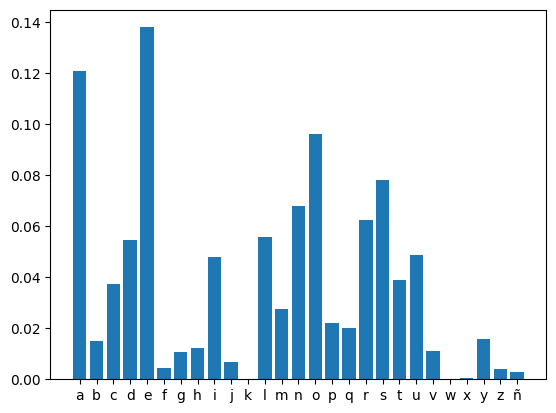

In [12]:
names = list(es_model.keys())
values = list(es_model.values())

plt.bar(range(len(es_model)), values, tick_label=names)
plt.show()

#### Testing and measures

Finally, we constructed the following functions that allow us to clean input texts and calculate their likelihood and log likelihood with respect to each language

In [13]:
def scan_test(text_file:str, language="en")->str:

    """
    Reads 'text_file' in 'language' format, clears nonalphabetic symbols
    """

    with open(text_file, 'r', encoding='utf-8') as file:
        text = (file.readlines())
    all_words = "".join(text)
    all_words = all_words.lower()
    for code in alphabets[f"non_alphabetic_{language}"]:
        all_words = all_words.replace(chr(code), "")

    return all_words

def likelihood(string:str, probs:dict):
    result = 1.0
    for letter in string:
        result = result*probs[letter]

    return result

def log_likelihood(string:str, probs:dict):
    result = 0.0
    for letter in string:
        if probs[letter] != 0:
            result = result + log(probs[letter])
    return result 
# We define the likelihood and loglikelihood functions

Based on these functions we performed 10 tests with the text files in the "Test_data" folder (a very small test but it allowed us to have a look at the model). We obtained 7 hits between 5 Spanish sentences and 5 English sentences.

#### Interactive input
You can test the model by executing the box below

In [ ]:
Text = str.lower(input ("Enter a phrase in English or Spanish: "))
Text = Text.replace(" ","")
spa_eng = int(input ("If you wrote in Spanish write 0, otherwise type 1: "))
log_li = int(input ("If you want to use log likelihood type 0 If you want to use likelihood type 1: "))

english = log_likelihood(Text, en_model), likelihood(Text, en_model)
spanish = log_likelihood(Text, es_model), likelihood(Text, es_model)

if english[log_li]>spanish[log_li]:
  print("I predict it is English")
  if spa_eng == 1:
    print("Correctly predicted",str(english[log_li]),str(spanish[log_li]) )
  else :
    print("I could not predict well ",str(english[log_li]),str(spanish[log_li]) )
else:
    print("I predict it is Spanish")
    if spa_eng == 0:
      print("Correctly predicted",str(english[log_li]),str(spanish[log_li])  )
    else :
      print("I could not predict well",str(english[log_li]),str(spanish[log_li]) )
# Using our english and spanish trained models, both of them will be compared to the new text by using likelihood abd loglikelihood 
# it will be determined what language the new text is, for confirmation we will se if the predicction is correct 


I predict it is English
Correctly predicted -99.42988039654819 -106.24796088857441
